<a href="https://colab.research.google.com/github/Rakesh00966/Lung-Cancer-Prediction/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Cancer Prediction

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv('/content/survey lung cancer.csv')
data.sample(6)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
222,F,77,1,1,1,2,2,2,2,2,2,1,1,1,2,YES
299,M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
296,M,63,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
273,F,59,1,2,2,2,2,2,2,2,1,2,2,2,1,YES
151,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES
193,F,64,1,1,1,2,2,1,1,1,1,1,1,1,1,YES


In [129]:
pd.set_option('display.max_columns',None)

In [130]:
df = pd.DataFrame(data)
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [148]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,270
0,39


In [131]:
variables = []
dtypes = []
unique = []
count = []
missing = []
for i in df.columns:
  variables.append(i)
  dtypes.append(df[i].dtype)
  unique.append(df[i].nunique())
  count.append(df[i].count())
  missing.append(df[i].isnull().sum())


In [132]:
op = pd.DataFrame({'variables':variables,'dtypes':dtypes,'unique':unique,'count':count,'missing':missing})
op

,variables,dtypes,unique,count,missing
0,GENDER,object,2,309,0
1,AGE,int64,39,309,0
2,SMOKING,int64,2,309,0
3,YELLOW_FINGERS,int64,2,309,0
4,ANXIETY,int64,2,309,0
5,PEER_PRESSURE,int64,2,309,0
6,CHRONIC DISEASE,int64,2,309,0
7,FATIGUE,int64,2,309,0
8,ALLERGY,int64,2,309,0
9,WHEEZING,int64,2,309,0


In [133]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<Axes: xlabel='AGE', ylabel='Count'>

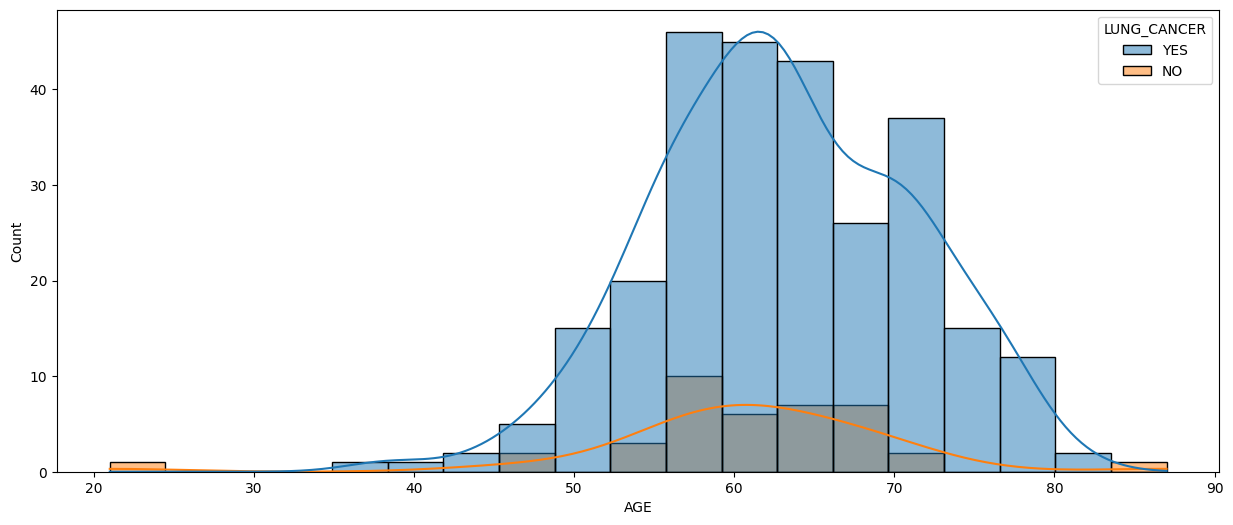

In [134]:
plt.figure(figsize=(15,6))
sns.histplot(data = df, x = 'AGE',hue='LUNG_CANCER',kde=True)

<Axes: xlabel='LUNG_CANCER', ylabel='AGE'>

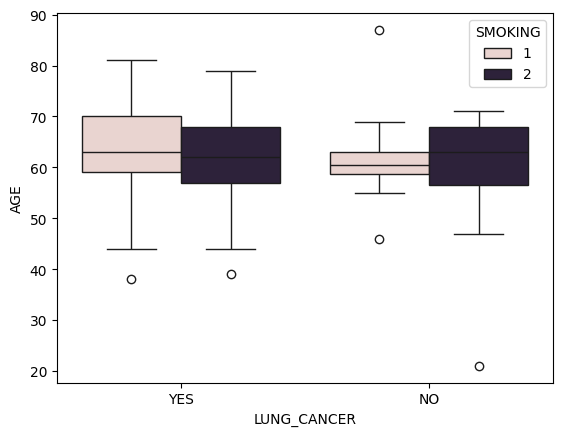

In [135]:
sns.boxplot(data = df, x = 'LUNG_CANCER',y='AGE',hue='SMOKING')

In [136]:
from sklearn.preprocessing import LabelEncoder

# Re-create the DataFrame from the original data to ensure a clean state
df = pd.DataFrame(data)

# Apply LabelEncoder to 'GENDER' and 'LUNG_CANCER' columns
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: >

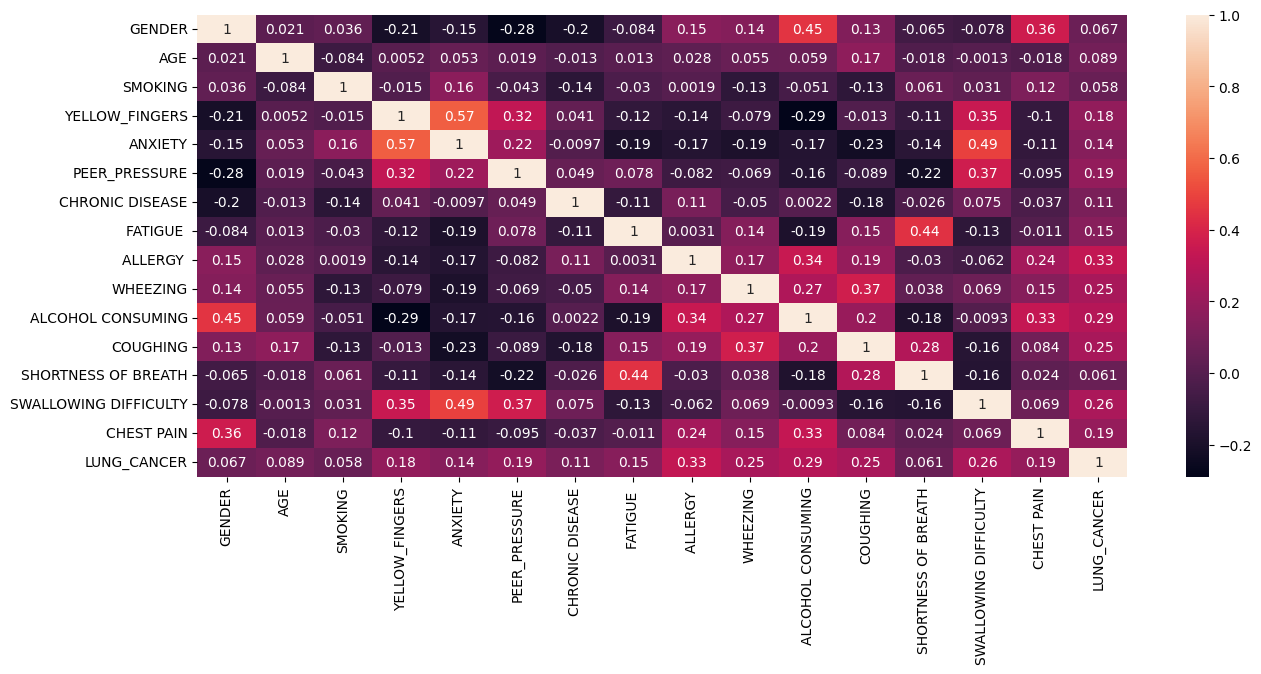

In [137]:
plt.figure(figsize=(15,6))
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)

/tmp/ipython-input-213141907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = lung_canc.values,y = lung_canc.index,palette='rocket')


<Axes: ylabel='None'>

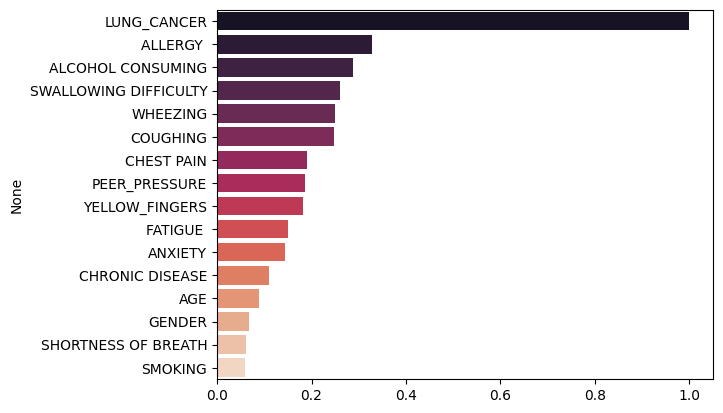

In [138]:
lung_canc = df_corr['LUNG_CANCER'].sort_values(ascending=False)
sns.barplot(x = lung_canc.values,y = lung_canc.index,palette='rocket')

In [139]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV,StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report
)

In [141]:
sc = StandardScaler()

In [142]:
X = df.drop('LUNG_CANCER',axis=1)
y = df['LUNG_CANCER']

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [145]:
models = [
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    SVC(probability=True, random_state=42)
]


In [150]:
param_grids = [
    {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7]}, # GB
    {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}, # RF
    {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, # Logistic Regression
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}, # KNN
    {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}, # Decision Tree
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']} # SVC
]
results = []
scoring_metric = 'f1_weighted'

print("\n--- 4.2. Starting Model Training and Optimization Process ---")

for model, param_grid in zip(models, param_grids):
    model_name = model.__class__.__name__
    print(f"\n---> Running RandomizedSearchCV for {model_name}...")

    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=10,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scoring_metric,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    rs.fit(X_train_scaled, y_train)
    y_pred = rs.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    roc_auc = np.nan
    if hasattr(rs, "predict_proba"):
        # For binary classification, roc_auc_score expects the probability of the positive class
        y_proba = rs.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\nResults for {model_name}:")
    print(f"F1 (Weighted): {f1:.4f} | Accuracy: {acc:.4f} | Recall (Weighted): {recall:.4f} | Precision (Weighted): {precision:.4f} | ROC-AUC: {roc_auc:.4f}")
    print(f"Best Parameters: {rs.best_params_}")

    results.append([
        model_name, acc, f1, recall, precision, roc_auc, rs.best_estimator_
    ])


--- 4.2. Starting Model Training and Optimization Process ---

---> Running RandomizedSearchCV for GradientBoostingClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for GradientBoostingClassifier:
F1 (Weighted): 0.9562 | Accuracy: 0.9516 | Recall (Weighted): 0.9516 | Precision (Weighted): 0.9621 | ROC-AUC: 0.9250
Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}

---> Running RandomizedSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for RandomForestClassifier:
F1 (Weighted): 0.9677 | Accuracy: 0.9677 | Recall (Weighted): 0.9677 | Precision (Weighted): 0.9677 | ROC-AUC: 0.9542
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}

---> Running RandomizedSearchCV for LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Results for LogisticRegression:
F1 (Weighted): 0.9677 | Accuracy: 0.9677 | Recall (Weighted):

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results for KNeighborsClassifier:
F1 (Weighted): 0.9677 | Accuracy: 0.9677 | Recall (Weighted): 0.9677 | Precision (Weighted): 0.9677 | ROC-AUC: 0.7292
Best Parameters: {'weights': 'distance', 'n_neighbors': 3}

---> Running RandomizedSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for DecisionTreeClassifier:
F1 (Weighted): 0.9457 | Accuracy: 0.9355 | Recall (Weighted): 0.9355 | Precision (Weighted): 0.9591 | ROC-AUC: 0.6750
Best Parameters: {'min_samples_split': 5, 'max_depth': 5}

---> Running RandomizedSearchCV for SVC...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results for SVC:
F1 (Weighted): 0.9677 | Accuracy: 0.9677 | Recall (Weighted): 0.9677 | Precision (Weighted): 0.9677 | ROC-AUC: 0.9417
Best Parameters: {'kernel': 'linear', 'C': 1}


In [151]:
results_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy', 'F1', 'Recall', 'Precision', 'ROC-AUC', 'Best Estimator']
).sort_values(by='F1', ascending=False).reset_index(drop=True)


In [152]:
best_model_row = results_df.iloc[0]
best_model_name = best_model_row['Model']
best_score = best_model_row['F1']

print("\n\n--- 4.3. COMPARISON TABLE FOR ALL MODELS ---")
print(results_df[['Model', 'Accuracy', 'F1', 'Recall', 'Precision', 'ROC-AUC']])





--- 4.3. COMPARISON TABLE FOR ALL MODELS ---
                        Model  Accuracy        F1    Recall  Precision  \
0      RandomForestClassifier  0.967742  0.967742  0.967742   0.967742   
1          LogisticRegression  0.967742  0.967742  0.967742   0.967742   
2                         SVC  0.967742  0.967742  0.967742   0.967742   
3        KNeighborsClassifier  0.967742  0.967742  0.967742   0.967742   
4  GradientBoostingClassifier  0.951613  0.956248  0.951613   0.962092   
5      DecisionTreeClassifier  0.935484  0.945690  0.935484   0.959121   

    ROC-AUC  
0  0.954167  
1  0.916667  
2  0.941667  
3  0.729167  
4  0.925000  
5  0.675000  


In [153]:
print(f"\nBest Model by F1-Score: {best_model_name} (F1-Score: {best_score:.4f})")


Best Model by F1-Score: RandomForestClassifier (F1-Score: 0.9677)


In [156]:
print("\n--- 5.4. Classification Report ---")
report = classification_report(y_test, y_pred)
print(f"--- Classification Report for {best_model_name} ---")
print(report)

print("\n--- 6.1. Saving the Final Model ---")
model_filename = 'stress_level_classifier_model.joblib'
print(f"Best model successfully saved as '{model_filename}'")



--- 5.4. Classification Report ---
--- Classification Report for RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


--- 6.1. Saving the Final Model ---
Best model successfully saved as 'stress_level_classifier_model.joblib'
